# Tobig's 16기 3주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [3]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [8]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [9]:
# parameter 개수
N = len(X_train.loc[0])

In [10]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.8675472 , 0.85670259, 0.23900981])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [11]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i] * parameters[i]
    return z

## Logistic Function

## $p = \frac{1}{1 + e^{-x_{i}\theta}} $

In [12]:
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1 / (1 + np.exp(-z))   
    return p

In [14]:
logistic(X_train.iloc[1], parameters)

0.8691797532005683

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) =- \Sigma(y_{i}\log p(X_{i}) + (1 - y_{i}) \log(1 - p(X_{i}))) $

In [16]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss = -(y * np.log(p) + (1-y) * np.log(1-p))
    return loss

In [43]:
def mse_i(X, y, parameters):
    y_hat = np.dot(X, parameters.T)
    loss = ((y-y_hat)**2) / 2
    return loss

In [75]:
def mse_i(X, y, parameters):
    y_hat = np.dot(X, parameters.T)
    loss = ((y - y_hat)**2) / 2
    return loss

In [18]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X, y, parameters)
    loss = loss / n #loss 평균값으로 계산
    return loss

In [19]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.283259620095605

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=$ $ -\Sigma(y_{i} - \theta^{T}X_{i})X_{ij} $
## ${\partial\over{\partial \theta_j}}l(p)=$ $ -\Sigma(y_{i} - p_{i})X_{ij} $

In [108]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = np.dot(X, parameters.T)
        gradient = (y-y_hat) * X[j]
    else:
        p = logistic(X, parameters)
        gradient = -((y-p) * X[j])
    return gradient

In [21]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.0600654591087463

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [22]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)
    
    return gradients

In [23]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[57.88774294628386, 10.86305635349856, 38.13427293360216]

## mini-batch
인덱스로 미니 배치 나누기

In [24]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: 
Mini Batch Gradient Descent는 한습 한 번에 데이터셋의 일부에 대해서만 기울기를 계산하기 때문에 한 번 학습할 때 batch_size만큼의 임의의 데이터셋을 사용한다. batch_idx 함수는 이 때 사용된 데이터가 무엇인지 나타내기 위해 인덱스값을 반환한다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [25]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate / n
    
    parameters -= gradients
    return parameters

In [26]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.86368802, 0.85597839, 0.23646753])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: 현재 학습 횟수
- num_epoch: 전체 데이터를 학습하는 총 횟수
<br>

BGD(Batch Gradient Descent): 학습 한 번에 모든 데이터셋에 대해 기울기를 계산 
SGD(Stochastic Gradient Descent): 학습 한 번에 임의의 데이터 하나에 대해서만 기울기를 계산
MGD(Mini Batch Gradient Descent): 학습 한 번에 데이터셋의 일부에 대해서만 기울기를 계산
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> SGD <br>
batch_size=k -> MGD <br>
batch_size=whole -> BGD

In [27]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [56]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size = X_train.shape[0])
new_param_bgd

epoch: 0  loss: 0.8763102129550872  params: [0.52816251 0.24192482 0.32233487]  gradients: [0.03480189852845223, -0.0011980487378194025, 0.020698200925397422]
epoch: 100  loss: 0.45845026488401924  params: [-0.81084304  0.83453784 -0.75507558]  gradients: [0.00395325460391564, -0.00641505195703935, 0.006590525957042062]
epoch: 200  loss: 0.3943390917634493  params: [-1.02988125  1.37631617 -1.29300497]  gradients: [0.0013238160228640752, -0.004560732759830591, 0.004463362309964241]
epoch: 300  loss: 0.3628535076827775  params: [-1.13590957  1.76970893 -1.67642553]  gradients: [0.0008929594947545248, -0.0034127806452985566, 0.003313380780235591]
epoch: 400  loss: 0.3444753192304073  params: [-1.21590175  2.07178829 -1.96877048]  gradients: [0.0007241271311171617, -0.0026864176920669363, 0.002591494185718843]
epoch: 500  loss: 0.33270793835836815  params: [-1.28235737  2.31400333 -2.20179392]  gradients: [0.0006116138995813922, -0.002191683560462432, 0.00210286424886729]
epoch: 600  loss

array([-1.50061979,  3.06556483, -2.91678767])

In [61]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size = 1)
new_param_sgd

epoch: 0  loss: 0.27458984814695325  params: [-0.89156966  1.09101057 -1.21406016]  gradients: [0.024832564958143233, 0.013513905601777471, 0.017471962799437885]
epoch: 100  loss: 0.07736671409386778  params: [-1.93032568  4.1750195  -4.06769113]  gradients: [0.007538543356787982, 0.0041024825051401695, 0.005304049312415353]
epoch: 200  loss: 0.07736266552157411  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [0.0075381595218080265, 0.004102273621776952, 0.005303779249677082]
epoch: 300  loss: 0.07736266518361716  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489767122, 0.004102273604340261, 0.005303779227133398]
epoch: 400  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 500  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 600  loss

array([-1.9303681 ,  4.17514311, -4.06780375])

In [49]:
new_param_mgd = gradient_descent(X_train, y_train, batch_size = 8)
new_param_mgd

epoch: 0  loss: 0.8337476594154678  params: [-0.24689191  0.20337169  0.34337541]  gradients: [0.04109761910790211, 0.039110848285012344, 0.05408486996172611]
epoch: 100  loss: 0.18307120940427898  params: [-1.70921761  3.67186596 -3.51852114]  gradients: [0.008221868503711172, 0.012106124273992777, 0.014576121991512658]
epoch: 200  loss: 0.16719005886418578  params: [-1.84519583  4.10573674 -3.92127877]  gradients: [0.008040559006781588, 0.011959501138841403, 0.01382979059915093]
epoch: 300  loss: 0.16337175546577284  params: [-1.88222857  4.22329735 -4.02984313]  gradients: [0.008005863453358044, 0.011928360108396655, 0.0136530055577422]
epoch: 400  loss: 0.16226168884912814  params: [-1.89336778  4.25861644 -4.06241387]  gradients: [0.007996451988560773, 0.011919632279585302, 0.013601822534142423]
epoch: 500  loss: 0.16192223759108548  params: [-1.89680921  4.26952438 -4.0724688 ]  gradients: [0.00799363532786596, 0.011916993249114619, 0.01358619065611887]
epoch: 600  loss: 0.161816

array([-1.89836298,  4.27444859, -4.07700728])

### Predict Label

In [62]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_sgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [51]:
from sklearn.metrics import *

In [59]:
# BGD
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 4,  6]], dtype=int64)

In [63]:
# SGD
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 1,  9]], dtype=int64)

In [52]:
# MGD
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 1,  9]], dtype=int64)

In [60]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("BGD accuracy:",accuracy)

BGD accuracy: 0.88


In [64]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("SGD accuracy:",accuracy)

SGD accuracy: 0.94


In [58]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("MGD accuracy:",accuracy)

MGD accuracy: 0.94


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [104]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [105]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [106]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.61342752, 2.27238257])

In [112]:
#경사하강법
new_param = gradient_descent(X, y, model='linear', num_epoch=500)
new_param

epoch: 0  loss: 0.39332275073051554  params: [0.99120348 1.04796538]  gradients: [-0.0517902549605577, -0.0353518207403942]
epoch: 100  loss: 0.22212365801253833  params: [0.63796111 2.30426226]  gradients: [-0.022043948485011736, -0.01491490661418284]
epoch: 200  loss: 0.22200651275325947  params: [0.63541535 2.30876503]  gradients: [-0.02208337586682535, -0.014913021281871422]
epoch: 300  loss: 0.2220060358042241  params: [0.63540494 2.30878345]  gradients: [-0.02208353713540278, -0.014913013570356067]
epoch: 400  loss: 0.22200603385341144  params: [0.63540489 2.30878353]  gradients: [-0.02208353779503459, -0.014913013538813906]


array([0.63540489, 2.30878353])

In [113]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

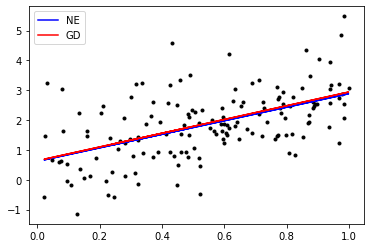

In [114]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()